In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Illustration of features matrix and target array

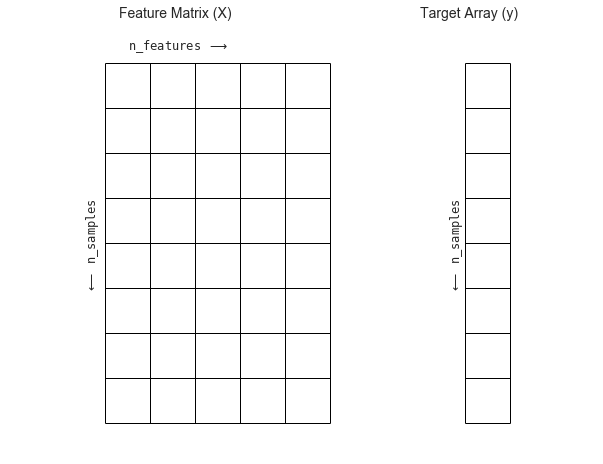

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')    # remove boarder
ax.axis('equal')  # equal grid

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=8, lw=1)
ax.hlines(range(9), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(0.3, 9, "Feature Matrix (X)", size=14)
ax.text(0.5, 8.3, 'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 5, '$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=8, lw=1)
ax.hlines(range(9), xmin=8, xmax=9, lw=1)
ax.text(7, 9, "Target Array (y)", size=14)
ax.text(8, 5, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop);

fig.savefig('img/features_target.png', bbox_inches="tight")

### Illustration of underfitting and overfitting

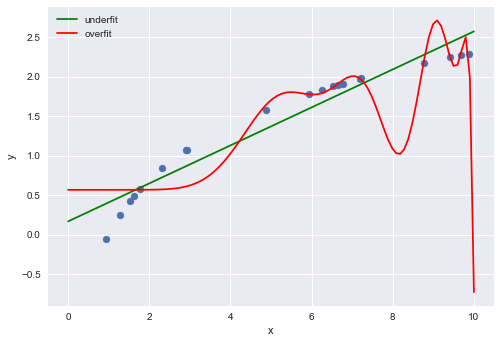

In [20]:
x = 10*np.random.random(20)
y = np.log(x)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
simple_model = make_pipeline(PolynomialFeatures(1), LinearRegression())
complex_model = make_pipeline(PolynomialFeatures(20), LinearRegression())

x = x.reshape(len(x), 1) # convert to 2D

simple_model.fit(x, y)
complex_model.fit(x, y)

xfit = np.linspace(0, 10, 100)[:, None]  # convert to 2D
y_simple = simple_model.predict(xfit)
y_complex = complex_model.predict(xfit)

plt.scatter(x, y)
plt.plot(xfit, y_simple, color='g', label='underfit')
plt.plot(xfit, y_complex, color='r', label='overfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();